In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
file = pd.read_csv('gapminder.csv')

In [4]:
files = file[['country',"incomeperperson", "alcconsumption", "femaleemployrate", "lifeexpectancy", "employrate"]]
data = files.copy()

In [5]:
data= data.replace(0, np.NaN)
data = data.dropna()

In [6]:
data

country   incomeperperson alcconsumption  femaleemployrate  \
0           Afghanistan                              .03  25.6000003814697   
1               Albania  1914.99655094922           7.29  42.0999984741211   
2               Algeria  2231.99333515006            .69  31.7000007629394   
3               Andorra  21943.3398976022          10.17                     
4                Angola  1381.00426770244           5.57  69.4000015258789   
..                  ...               ...            ...               ...   
208             Vietnam  722.807558834445           3.91  67.5999984741211   
209  West Bank and Gaza                                   11.3000001907349   
210         Yemen, Rep.    610.3573673206             .2  20.2999992370605   
211              Zambia  432.226336974583           3.56              53.5   
212            Zimbabwe  320.771889948584           4.96  58.0999984741211   

    lifeexpectancy        employrate  
0           48.673  55.7000007629394  
1           76.918  51.4000015258789  
2           73.131              50.5  
3                                     
4           51.093  75.6999969482422  
..             ...               ...  
208         75.181                71  
209         72.832                32  
210         65.493                39  
211         49.025                61  
212         51.384  66.8000030517578  

[213 rows x 6 columns]

In [7]:
data.isnull().sum()

country             0
incomeperperson     0
alcconsumption      0
femaleemployrate    0
lifeexpectancy      0
employrate          0
dtype: int64

In [8]:
data.dtypes

country             object
incomeperperson     object
alcconsumption      object
femaleemployrate    object
lifeexpectancy      object
employrate          object
dtype: object

In [9]:
data['alcconsumption'] = pd.to_numeric(data['alcconsumption'], errors='coerce')
data['incomeperperson'] = pd.to_numeric(data['incomeperperson'], errors='coerce')
data['femaleemployrate'] = pd.to_numeric(data['femaleemployrate'], errors='coerce')
data['lifeexpectancy'] = pd.to_numeric(data['lifeexpectancy'], errors='coerce')
data['employrate'] = pd.to_numeric(data['employrate'], errors='coerce')


In [10]:
data.dtypes

country              object
incomeperperson     float64
alcconsumption      float64
femaleemployrate    float64
lifeexpectancy      float64
employrate          float64
dtype: object

In [11]:
#lifeexpectancy rate
print("first values for life expectancy:")
lifeexpectancyfreq = pd.concat(dict(counts = data["lifeexpectancy"].value_counts(sort=False, dropna=False), percentages = data["lifeexpectancy"].value_counts(sort=False, dropna=False, normalize=True)), axis=1)
print(lifeexpectancyfreq.head(15))

#income per person
print("first values for capita GDP:")
gdp_freq = pd.concat(dict(counts = data["incomeperperson"].value_counts(sort=False, dropna=False), percentages = data["incomeperperson"].value_counts(sort=False, dropna=False, normalize=True)), axis=1)
print(gdp_freq.head(5))

first values for life expectancy:
        counts  percentages
NaN         22     0.103286
63.125       1     0.004695
74.576       1     0.004695
62.475       1     0.004695
74.414       1     0.004695
79.977       1     0.004695
58.199       1     0.004695
75.670       1     0.004695
81.012       1     0.004695
72.283       1     0.004695
55.442       1     0.004695
81.855       1     0.004695
48.398       1     0.004695
68.944       1     0.004695
75.133       1     0.004695
first values for capita GDP:
              counts  percentages
NaN               23     0.107981
8614.120219        1     0.004695
39972.352768       1     0.004695
279.180453         1     0.004695
161.317137         1     0.004695


In [12]:
print("first values for capita GDP:")
gdp_freq = pd.concat(dict(counts = data["incomeperperson"].value_counts(sort=False, dropna=False), percentages = data["incomeperperson"].value_counts(sort=False, dropna=False, normalize=True)), axis=1)
print(gdp_freq.head(5))


first values for capita GDP:
              counts  percentages
NaN               23     0.107981
8614.120219        1     0.004695
39972.352768       1     0.004695
279.180453         1     0.004695
161.317137         1     0.004695


In [13]:
#make new categorical variable to label income per person in 4 categories
#calculate frequency in bins
print('Income per person in categories')
data['incomelabel'] =pd.cut(data.incomeperperson,4,labels=['low','medium','high','very high'])
income_freq = pd.concat(dict(counts = data["incomelabel"].value_counts(sort=False, dropna=False),
                                   percentages = data["incomelabel"].value_counts(sort=False, dropna=False,
                                                                                       normalize=True)),
                            axis=1)
print("Frequency distribution - income per person:\n", income_freq)


#What are the countries with high and very high GDP? Order by income
print('Countries with high and very high GDP')
highincome = data[(data['incomelabel'] == 'high') | (data['incomelabel'] == 'very high') ]
print(highincome.loc[:, ['country', 'incomeperperson', 'incomelabel']].sort_values(by='incomelabel', ascending=False))

Income per person in categories
Frequency distribution - income per person:
            counts  percentages
low           169     0.793427
medium         18     0.084507
high            1     0.004695
very high       2     0.009390
NaN            23     0.107981
Countries with high and very high GDP
           country  incomeperperson incomelabel
109  Liechtenstein     81647.100031   very high
127         Monaco    105147.437697   very high
20         Bermuda     62682.147006        high


In [14]:
print('Countries by country')
country_counts = data.groupby('country').size()
print(country_counts)
print('\n')

print('GDP Statistics by country')
gdp_mean = data.groupby('country')['incomeperperson'].agg([np.mean, np.median, len])
print(gdp_mean)

print('employment rate by country')
employment_mean = data.groupby('country')['employrate'].agg([np.mean, np.median, len])
print(employment_mean)

print('life expectancy by country')
lifeexpectancy_mean = data.groupby('country')['lifeexpectancy'].agg([np.mean, np.median, len])
print(lifeexpectancy_mean)

Countries by country
country
Afghanistan           1
Albania               1
Algeria               1
Andorra               1
Angola                1
                     ..
Vietnam               1
West Bank and Gaza    1
Yemen, Rep.           1
Zambia                1
Zimbabwe              1
Length: 213, dtype: int64


GDP Statistics by country
                            mean        median  len
country                                            
Afghanistan                  NaN           NaN  1.0
Albania              1914.996551   1914.996551  1.0
Algeria              2231.993335   2231.993335  1.0
Andorra             21943.339898  21943.339898  1.0
Angola               1381.004268   1381.004268  1.0
...                          ...           ...  ...
Vietnam               722.807559    722.807559  1.0
West Bank and Gaza           NaN           NaN  1.0
Yemen, Rep.           610.357367    610.357367  1.0
Zambia                432.226337    432.226337  1.0
Zimbabwe              320.771

C:\Users\ALU Student51\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ALU Student51\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


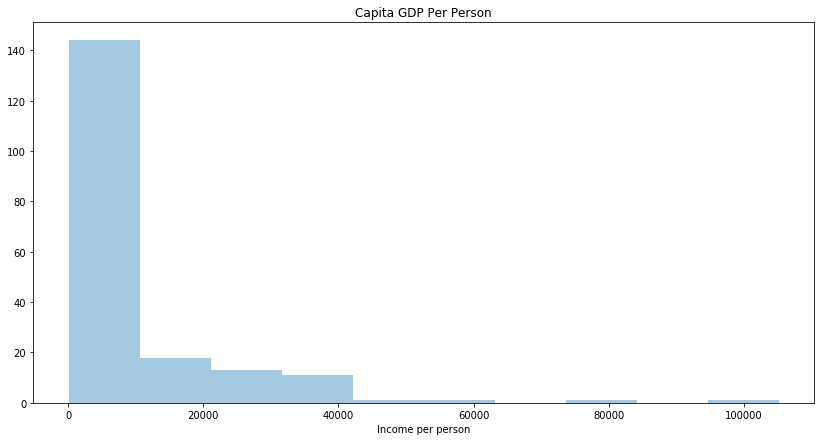

In [15]:
plt.figure(figsize=(14, 7))
sns.distplot(data['incomeperperson'], bins=10, kde=False)
plt.xlabel('Income per person')
plt.title('Capita GDP Per Person')
plt.show()

In [25]:
plt.figure(figsize=(14, 7))
sns.distplot(data['lifeexpectancy'].dropna())
plt.xlabel('life expectancy per country')
plt.title('Percentage oflife expectancy')
plt.show()

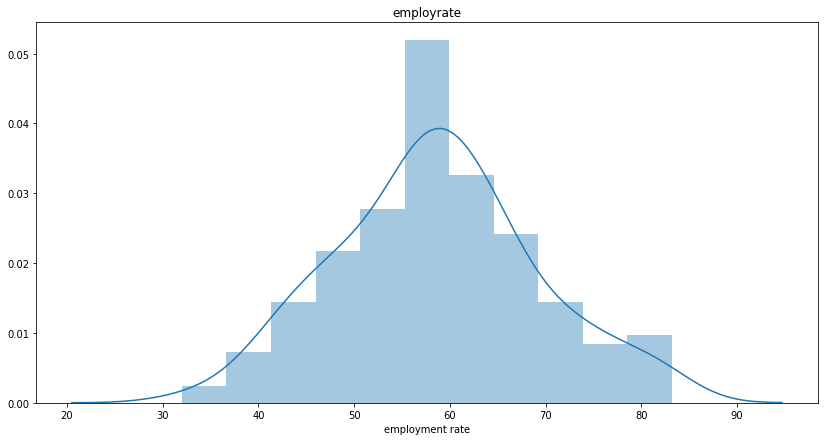

In [17]:
plt.figure(figsize=(14, 7))
sns.distplot(data['employrate'].dropna())
plt.xlabel('employment rate')
plt.title('employrate')
plt.show()

In [ ]:
fig = plt.figure(figsize=(16,4))
sns.regplot(x="lifeexpectancy", y="incomeperperson", fit_reg=True, data=data);
plt.xlabel('life expectancy');
plt.ylabel('capita GDP');
plt.title('Scatterplot for the association between Internet usage and income level');

Text(0.5, 0, 'Income per person')

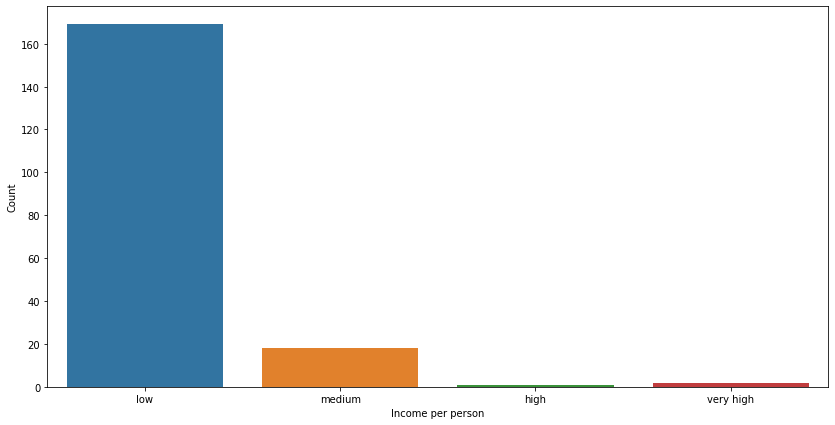

In [19]:
plt.figure(figsize=(14, 7))
sns.countplot(x='incomelabel', data=data)
plt.ylabel('Count')
plt.xlabel('Income per person')

Text(0.5, 21.920000000000016, 'country')

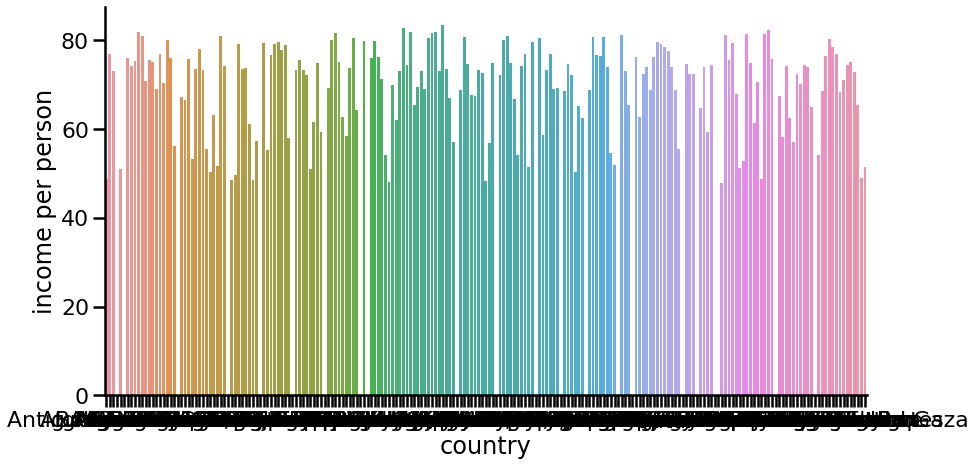

In [23]:
sns.factorplot(x='country', y='lifeexpectancy', data=data, kind='bar', size=7, aspect=2)
plt.ylabel('life expectancy')
plt.xlabel('country')
